In [2]:
# reload

%load_ext autoreload
%autoreload 2

In [3]:
# import  
#%matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import time
import numpy as np
import sys
import math
import scipy.stats as stats
#import wandb
from tqdm import tqdm
from functions_dicts_to_parse_data import *
# Increase plot font size from default for all plots instead of setting it in each plot 
plt.rcParams.update({'font.size': 22})

In [52]:
# redirect all print statements to file instead of console

#file_path = 'logs_from_notebook.txt'
#sys.stdout = open(file_path, "w")

In [5]:
#=========================================
# What info / plots do you want displayed
#=========================================
print_logfile_info = True
print_byte_matrix = True
histogram_plots = True
distance_plots = True
timeseries_plots = True; 
# timeseries plots: Which run should I select for timeseries plots (Since it would be too much to plot every UE in every run) 
ts_plot_run_nums = 'run3'; 
# Which UEs (or IMSIs) should we make time series plots for from the ts_plot_run_nums runs 
ts_plot_IMSIs = [1]
# When using time aggregation to smooth out plots and make them more visually interpretable what window size to use 
time_wind_str = '500ms'
time_wind_val = 500
#===================================
# Data source
#=================================== 
data_dir = '../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/'

# This is a subset of log files that we would like to parse and plot at the moment depending on what is in the data 
files = ran_files+[
                   #'dlThroughput_trace.txt',
                   'rtt_trace.txt', 'delay_trace.txt', 
                   'handover_trace.txt', 'mobility_trace.txt'         
                   #'vrBurst_trace.txt', 'vrFragment_trace.txt',
                   #'dashClient_trace.txt', 'mpegPlayer_trace.txt', # video streaming
                   #'httpServerDelay_trace.txt', 'httpClientDelay_trace.txt', 'httpClientRtt_trace.txt'
                    ]
# Specify here topology details from the dataset we are using 
# This can be infered from the files, but this is easier 
total_num_cells=3
total_num_ues=60
num_runs = 10
skip_runs = []
sim_time = 200 # seconds

In [6]:
print('Raw data folder: \n'+data_dir+'\n')
plot_dir = './plots/'+data_dir.split('/')[-2]+'/'
print('Plots saved in folder: \n'+plot_dir+'\n')

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

info_file = open(data_dir+'run1/simulation_info.txt')
for i in range(95):
    print(info_file.readline())
    
sim_start_time = pd.to_datetime(0, unit='s', origin='unix')
sim_end_time = pd.to_datetime(sim_time, unit='s', origin='unix')

Raw data folder: 
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/

Plots saved in folder: 
./plots/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/

Waf: Entering directory `/home/ubuntu/mobile-network-datasets-ns3/ns-3-dev/build'



Scenario Topology Parameters:           

                                        

Macro layer BS positions:               Regular hexaonal lay down

Macro layer num of rings:               0

Macro layer num of BSs:                 0

Micro layer BS antenna pattern:         Cosine 120 degrees

Micro layer of BSs:                     Disabled

Num of UEs:                             0

Number of UEs per BS (per sector):      20

Antenna down tilt angle:                0 deg

3GPP Scenario:                          UMi

  (ISD: 0.5 km, BS height: 10 m, UE height: 1.5 m, UE-BS min dist: 10 m)

                                        

Radio Parameters:                       


In [7]:
# initilize wandb for experiment tracking
config_dict = {'dataset': data_dir.split('/')[-2], 'window size': time_wind_str, 'log files processed': files,
              'simulation time': sim_time, 'num of cells': total_num_cells, 'num of UEs':total_num_ues,
              'num of runs':num_runs, 'run used for timeseriess plots': ts_plot_run_nums, 
               'IMSIs used for timeseries plots':ts_plot_IMSIs}
#wandb.init(project="mobile-radio-dataset", entity="network-intelligence", config=config_dict)
print(config_dict)

{'dataset': 'lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq', 'window size': '500ms', 'log files processed': ['DlTxPhyStats.txt', 'UlRxPhyStats.txt', 'UlSinrStats.txt', 'UlPdcpStats.txt', 'DlRsrpSinrStats.txt', 'UlRlcStats.txt', 'UlMacStats.txt', 'UlTxPhyStats.txt', 'DlPdcpStats.txt', 'DlRlcStats.txt', 'DlRxPhyStats.txt', 'DlMacStats.txt', 'rtt_trace.txt', 'delay_trace.txt', 'handover_trace.txt', 'mobility_trace.txt'], 'simulation time': 200, 'num of cells': 3, 'num of UEs': 60, 'num of runs': 10, 'run used for timeseriess plots': 'run3', 'IMSIs used for timeseries plots': [1]}


  0%|                                                                                                                                                                               | 0/10 [00:00<?, ?it/s]

../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3
Elapsed wall clock: 1302s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3/DlTxPhyStats.txt
time to read file:  0.14113998413085938
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.506 ,  200.912 )
log runtime: 200.406  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3/UlRxPhyStats.txt
time to read file:  0.6262502670288086
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.513 ,  200.909 )
log runtime: 200.396  seconds
--------------------------------------------
UlSinrStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3/UlSinrStats.txt
time to read file:  0.0438885688781

 10%|████████████████▋                                                                                                                                                      | 1/10 [00:24<03:38, 24.28s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1043 1043  333  333]
 [ 574  574  330  343]
 [1043    0  333  332]
 [ 557    0  329  322]]
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run6
Elapsed wall clock: 1248s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run6/DlTxPhyStats.txt
time to read file:  0.10585355758666992
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.504 ,  200.894 )
log runtime: 200.39000000000001  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run6/UlRxPhyStats.txt
time to read file:  0.4733116626739502
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.528 ,  200.883 )
log runtime: 200.3550

 20%|█████████████████████████████████▍                                                                                                                                     | 2/10 [00:44<02:54, 21.86s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1052 1052  334  334]
 [ 597  597  331  343]
 [1052    0  334  334]
 [ 577    0  330  325]]
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run8
Elapsed wall clock: 1217s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run8/DlTxPhyStats.txt
time to read file:  0.10283875465393066
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.504 ,  200.9 )
log runtime: 200.39600000000002  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run8/UlRxPhyStats.txt
time to read file:  0.48603272438049316
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.513 ,  200.9 )
log runtime: 200.387  se

 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [01:04<02:27, 21.08s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1024 1024  337  337]
 [ 646  647  337  343]
 [1024    0  337  337]
 [ 629    0  335  331]]
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run5
Elapsed wall clock: 1213s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run5/DlTxPhyStats.txt
time to read file:  0.09364128112792969
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.503 ,  201.027 )
log runtime: 200.524  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run5/UlRxPhyStats.txt
time to read file:  0.42143726348876953
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.512 ,  201.032 )
log runtime: 200.52  seconds
--

 40%|██████████████████████████████████████████████████████████████████▊                                                                                                    | 4/10 [01:23<02:02, 20.34s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1035 1035  339  338]
 [ 666  666  338  343]
 [1034    0  339  338]
 [ 638    0  338  334]]
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run7
Elapsed wall clock: 1201s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run7/DlTxPhyStats.txt
time to read file:  0.09668612480163574
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.51 ,  200.905 )
log runtime: 200.395  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run7/UlRxPhyStats.txt
time to read file:  0.44449806213378906
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.514 ,  200.905 )
log runtime: 200.391  seconds
--

 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [01:43<01:40, 20.07s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1039 1039  336  336]
 [ 617  617  334  343]
 [1039    0  336  336]
 [ 592    0  333  329]]
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run10
Elapsed wall clock: 1288s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run10/DlTxPhyStats.txt
time to read file:  0.09167695045471191
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.507 ,  201.031 )
log runtime: 200.524  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run10/UlRxPhyStats.txt
time to read file:  0.5683259963989258
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.513 ,  201.049 )
log runtime: 200.536  seconds

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [02:05<01:23, 20.90s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1048 1048  335  334]
 [ 601  601  332  343]
 [1048    0  334  334]
 [ 580    0  331  326]]
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run9
Elapsed wall clock: 1210s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run9/DlTxPhyStats.txt
time to read file:  0.09210634231567383
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.511 ,  200.904 )
log runtime: 200.393  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run9/UlRxPhyStats.txt
time to read file:  0.35382580757141113
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.514 ,  201.034 )
log runtime: 200.51999999999998

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [02:23<00:59, 19.87s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1033 1033  337  337]
 [ 647  647  334  343]
 [1033    0  337  336]
 [ 621    0  334  330]]
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run1
Elapsed wall clock: 1269s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run1/DlTxPhyStats.txt
time to read file:  0.09349966049194336
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.503 ,  200.9 )
log runtime: 200.39700000000002  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run1/UlRxPhyStats.txt
time to read file:  0.4985039234161377
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.514 ,  200.91 )
log runtime: 200.396  se

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 8/10 [02:44<00:40, 20.06s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1040 1040  333  333]
 [ 603  603  330  343]
 [1040    0  333  333]
 [ 583    0  329  323]]
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run4
Elapsed wall clock: 1188s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run4/DlTxPhyStats.txt
time to read file:  0.0878896713256836
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.503 ,  200.986 )
log runtime: 200.483  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run4/UlRxPhyStats.txt
time to read file:  0.38442158699035645
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.512 ,  201.049 )
log runtime: 200.537  seconds
--

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [03:02<00:19, 19.68s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1016 1016  336  336]
 [ 636  637  333  343]
 [1016    0  336  335]
 [ 609    0  332  328]]
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run2
Elapsed wall clock: 1268s

--------------------------------------------
DlTxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run2/DlTxPhyStats.txt
time to read file:  0.0934150218963623
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.507 ,  201.041 )
log runtime: 200.534  seconds
--------------------------------------------
UlRxPhyStats.txt
../../data_volume/lte_3macro_60Ue_delay_rtt_UMi_ISD500m__60Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run2/UlRxPhyStats.txt
time to read file:  0.400205135345459
ueIds: min: 1 max: 60 count: 60
log time (start, end): ( 0.524 ,  201.049 )
log runtime: 200.525  seconds
----

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:22<00:00, 20.20s/it]

Byte Matrix in MB
  X  phy mac rlc pdcp
dlTx  x   x   x   x
ulTx  x   x   x   x
dlRx  x   x   x   x
ulRx  x   x   x   x
[[1050 1050  336  335]
 [ 667  667  334  343]
 [1050    0  335  335]
 [ 643    0  333  328]]


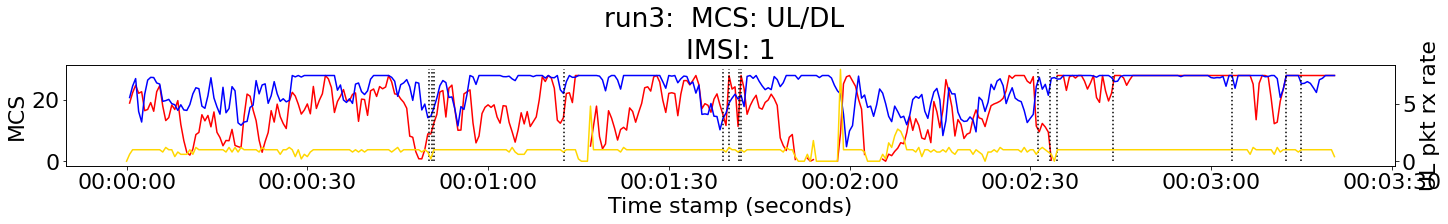

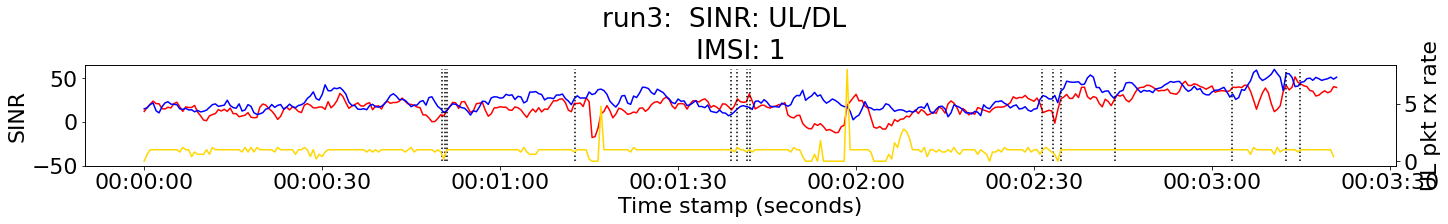

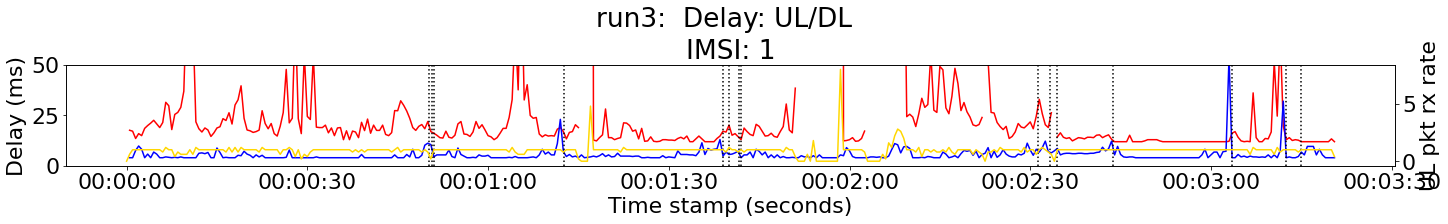

In [8]:
#=======================================
# Initilizing empty lists 
#=======================================

# To measure delay probe delivery rate 
# These are values aggregated over all UEs over the símulations time over all runs 
ul_delay_probe_delivery_rate = 0
dl_delay_probe_delivery_rate = 0
rtt_probe_delivery_rate = 0
ul_avg_thput = 0
dl_avg_thput = 0

# Baselines for empty networks
# Aggregate over UEs and runs for histogram plots
# These are arrays with samples aggregated over all UEs over the simulations time over all runs 
# These are not windowed 
ul_delays = np.empty(0)
dl_delays = np.empty(0)
rtt_delays = np.empty(0)

ul_mcs = np.empty(0)
dl_mcs = np.empty(0)
ul_sinr = np.empty(0)
dl_sinr = np.empty(0)
dl_rsrp = np.empty(0)

# Baselines for empty networks
# distance to BS versus metrics, aggregated over windows 
# These are arrays with samples aggregated over all UEs over the simulations time over all runs 
# These are windowed 
w_ul_delays = np.empty(0)
w_dl_delays = np.empty(0)
w_rtt_delays = np.empty(0)
w_ul_sinr = np.empty(0)
w_dl_sinr = np.empty(0)
w_rsrp = np.empty(0)
w_dist_to_cell = np.empty(0)
w_avg_ue_xpos = np.empty(0)
w_avg_ue_ypos = np.empty(0)
w_mode_assoc_cell = np.empty(0)

w_ul_mcs = np.empty(0)
w_dl_mcs = np.empty(0)

ul_pkt_rx = np.empty(0)
dl_pkt_rx = np.empty(0)
rtt_pkt_rx = np.empty(0)

cell_ul_thput = np.empty(0)
cell_dl_thput = np.empty(0)

ul_thput = np.empty(0)
dl_thput = np.empty(0)

# mi here is multi-indexed, with time and IMSi as the 2 levels of indices 
mi_ul_delays = pd.DataFrame()
mi_dl_delays = np.empty(0)
mi_rtt_delays = np.empty(0)
mi_ul_sinr = np.empty(0)
mi_dl_sinr = np.empty(0)
mi_rsrp = np.empty(0)
mi_dist_to_cell = np.empty(0)



# app specific observations for plotting
# aggregated over all UEs running this app to plot histograms 
page_load_time = np.empty(0) # page load time over all webpages viewed 
webpage_size = np.empty(0) # size of the webpage 
segment_bitrate = np.empty(0) # bitrate of segment requested over all videos watched
vr_burst_time = np.empty(0) # time to receive a full burst in VR 

# handover related initializers
hos_per_cell_per_time = 0
time_bw_hos = np.empty(0) # seconds 

# constant multipliers
M = (10**6)
K = (10**3)





#=======================================
# Iterate over runs and files 
#=======================================


#=================================================================
#for run in os.listdir(data_dir):
#for run in tqdm(glob.glob(data_dir+'run3')):
for run in tqdm(glob.glob(data_dir+'run*')):
#=================================================================
    dict_gnb_pos = pd.read_csv(data_dir+'run1/gnb_locations.txt', sep=',').set_index('cellId').to_dict('index')
    dict_gnb_pos[0] = {'gnbpos_x': np.nan, 'gnbpos_y': np.nan, 'gnbpos_z': np.nan}
    
    vr_imsi=np.empty(0)
    dash_imsi=np.empty(0)
    http_imsi=np.empty(0)

    print('============================================================')
    print (run)
    print('============================================================')
    only_run = run.split('/')[-1]
    if only_run in skip_runs:
        continue
    
    # check if run ran to completion
    with open(run+'/simulation_info.txt', "r") as sim_info_file:
        last_line = sim_info_file.readlines()[-1]
        print(last_line)
        if 'Elapsed wall clock' not in last_line:
            print('This run did not finish to completion, skipping it')
            continue
            
    # To store and compare the number of bytes sent and received in different RAN layers 
    bytes_matrix = np.zeros((4, 4), dtype=int)
    # time series plots for a chosen run 
    if ts_plot_run_nums in run:
    #if True:    
        # Aggregate plots from different files into one figure since we iterate over files
        # subplots for the chosen IMSI values for the one chosen run 
        # ul mcs, dl mcs figure
        if 'UlMacStats.txt'in files and 'DlMacStats.txt' in files:
            fig_mcs, axs_mcs = plt.subplots(len(ts_plot_IMSIs),1,figsize=(20,(len(ts_plot_IMSIs)*3)), constrained_layout = True, squeeze=False)
            fig_mcs.suptitle(only_run+':  MCS: UL/DL')
        if 'DlRsrpSinrStats.txt' in files and 'UlSinrStats.txt' in files: 
            # ul sinr and dl sinr
            fig_sinr, axs_sinr = plt.subplots(len(ts_plot_IMSIs),1,figsize=(20,(len(ts_plot_IMSIs)*3)), constrained_layout = True, squeeze=False)
            fig_sinr.suptitle(only_run+':  SINR: UL/DL')
        if 'delay_trace.txt' in files:
            # ul delay, dl delay, rtt figure 
            fig_delay, axs_delay = plt.subplots(len(ts_plot_IMSIs),1,figsize=(20,(len(ts_plot_IMSIs)*3)), constrained_layout = True, squeeze=False)
            fig_delay.suptitle(only_run+':  Delay: UL/DL')
        
        
    
#=================================================================
    for file in files:
#=================================================================
        print('--------------------------------------------')
        print(file)
        start_time = time.time()
        
        #=======================================
        # Preprocess logs 
        #=======================================
        
        ## Read file while fixing the tab issue
        if file in files_with_trailing_tab:
            #df = pd.read_csv(data_dir+run+'/'+file, sep='\t', usecols=range(0,18))
            df = pd.read_csv(run+'/'+file, sep='\t', usecols=range(0,18))
            print(run+'/'+file)
        else:
            #df = pd.read_csv(data_dir+run+'/'+file, sep='\t')
            df = pd.read_csv(run+'/'+file, sep='\t')
            print(run+'/'+file)
        
        print('time to read file: ', (time.time() - start_time))
        
        
        ## Do some file specific preprocessing
        ## Make uniform the timestamp units convert them all to micro seconds 
        if '% time' in df.columns:
            df.rename(columns = {'% time':'tstamp_us'}, inplace = True)
            if file_name_to_tstamp_unit[file] == 'ms':
                df['tstamp_us'] = df['tstamp_us']*K
            elif file_name_to_tstamp_unit[file] == 's':
                df['tstamp_us'] = df['tstamp_us']*M
        ## Make uniform the timestamp units        
        if '% start' in df.columns:
            ## TO DO: check if this is actually micro seconds. I think it is seconds   
            df.rename(columns = {'% start':'tstamp_us'}, inplace = True)
            df.rename(columns = {'end':'end_timeslot_us'}, inplace = True)
            df['tstamp_us'] = df['tstamp_us']*M
            df['end_timeslot_us'] = df['end_timeslot_us']*M
        ## Some internally generated logs use the naming 'CellId' replace that with 'cellId'
        if ('CellId' in df.columns):
            df.rename(columns = {'CellId':'cellId'}, inplace = True)
        if ('currentCellId' in df.columns):
            df.rename(columns = {'currentCellId':'cellId'}, inplace = True)    
        
        # Warning: cellId and IMSI here are IP addresses, but it should not matter since 
        # there will only be 1 UE doing these ul and dl throughput scans   
        if file == 'dlThroughput_trace.txt':
            df.rename(columns = {'toAddr':'IMSI', 'fromAddr': 'cellId'}, inplace = True)
            assert (df['IMSI'].nunique() == 1), "More than one throughput measurement UE is in the logs" 
        if file == 'ulThroughput_trace.txt':
            df.rename(columns = {'toAddr':'cellId', 'fromAddr': 'IMSI'}, inplace = True)
            assert (df['IMSI'].nunique() == 1), "More than one throughput measurement UE is in the logs" 
            
        ## Just for plotting change the timestamp_us to seconds and delay values to milli seconds 
        ## since I am mostly plotting directly from pandas and don't know how to add a multiplicative factor to a column    
        if 'tstamp_us' in df.columns:
            df['tstamp_us'] = df['tstamp_us']/M
            # Set datetime index for all files so that we can do series operations 
            datatime_timestamps = pd.to_datetime(df['tstamp_us'], unit='s', origin='unix')
            df = df.set_index(datatime_timestamps, inplace=False)
            
            if file in a_vs_b_files: 
                # add a sample at the beginning and ending of every timeseries at sim_start_time and sim_end_time. 
                # This way the timeseries after resampling are all of the same length 
                alignment_sample = np.empty(df.shape[1])
                alignment_sample[:] = np.nan
                start_sample = pd.DataFrame([alignment_sample], columns=df.columns, index=[sim_start_time])
                end_sample = pd.DataFrame([alignment_sample], columns=df.columns, index=[sim_end_time])
                if 'dir' in df.columns:
                    for imsi in range(1,total_num_ues+1):
                        for di in ['UL', 'DL']:
                            start_sample['IMSI'] = imsi
                            start_sample['dir'] = di
                            end_sample['IMSI'] = imsi
                            end_sample['dir'] = di
                            df = pd.concat([start_sample, df, end_sample])
                elif 'cellId' in df.columns:
                    for imsi in range(1,total_num_ues+1):
                        start_sample['IMSI'] = imsi
                        start_sample['cellId'] = 0
                        end_sample['IMSI'] = imsi
                        end_sample['cellId'] = 0
                        df = pd.concat([start_sample, df, end_sample])
                else:
                    for imsi in range(1,total_num_ues+1):
                        start_sample['IMSI'] = imsi
                        end_sample['IMSI'] = imsi
                        df = pd.concat([start_sample, df, end_sample])
        
        if file == 'dlThroughput_trace.txt' or file == 'ulThroughput_trace.txt':
            df['IMSI'] = 1
            thput_meas_imsi = 1
        
        # converting all delay values to ms instead of us
        if 'delay' in df.columns:
            df['delay'] = df['delay']/K
        
        #=======================================
        # Print log file info  
        #=======================================
        if print_logfile_info:
            ## Display info about the UEs who have made entries in this file to make sure that all the UEs who should be here are here. 
            print('ueIds: min:', min(df['IMSI'].value_counts().index), 'max:', max(df['IMSI'].value_counts().index),
                 'count:', len(df['IMSI'].value_counts().index))
            if len(df['IMSI'].value_counts().index) < total_num_ues:
                print('WARNING: Fewer UEs in this file than the total number in the simulation')
                print(df['IMSI'].value_counts())

            ## Display info about the Cells who have made entries in this file
            #print('cellIds: min:', min(df['cellId'].value_counts().index), 'max:', max(df['cellId'].value_counts().index),
            #     'count:', len(df['cellId'].value_counts().index))

            ## Total runtime of log
            print('log time (start, end): (', np.nanmin(df['tstamp_us']), ', ' ,np.nanmax(df['tstamp_us']), ')')
            print('log runtime:', (np.nanmax(df['tstamp_us']) - np.nanmin(df['tstamp_us'])), ' seconds')
        
        
        #=======================================
        # Byte matrix: Aggregate bytes over runs  
        #=======================================
        
        ## Gather the number of bytes sent from/to all UEs in each layer and direction to compare
        if file == 'DlTxPhyStats.txt':
            bytes_matrix[0,0] = df['size'].sum()/M
        elif file == 'DlRxPhyStats.txt':
            bytes_matrix[2,0] = df['size'].sum()/M
        elif file == 'UlTxPhyStats.txt':
            bytes_matrix[1,0] = df['size'].sum()/M
        elif file == 'UlRxPhyStats.txt':
            bytes_matrix[3,0] = df['size'].sum()/M
        elif file == 'DlMacStats.txt':
            bytes_matrix[0,1] = (df['sizeTb1'].sum() + df['sizeTb2'].sum())/M
        elif file == 'UlMacStats.txt':
            bytes_matrix[1,1] = df['size'].sum()/M
        elif file == 'DlRlcStats.txt':
            bytes_matrix[0,2] = df['TxBytes'].sum()/M
            bytes_matrix[2,2] = df['RxBytes'].sum()/M
        elif file == 'UlRlcStats.txt':
            bytes_matrix[1,2] = df['TxBytes'].sum()/M
            bytes_matrix[3,2] = df['RxBytes'].sum()/M
        elif file == 'DlPdcpStats.txt':
            bytes_matrix[0,3] = df['TxBytes'].sum()/M
            bytes_matrix[2,3] = df['RxBytes'].sum()/M
        elif file == 'UlPdcpStats.txt':
            bytes_matrix[1,3] = df['TxBytes'].sum()/M
            bytes_matrix[3,3] = df['RxBytes'].sum()/M

        
        #======================================================
        # File specific extraction and aggregation of metrics  
        #======================================================
        
        if file == 'UlMacStats.txt':
            cell_ul_thput = np.append(cell_ul_thput, df.groupby(by=['cellId'])['size'].resample(time_wind_str).sum()/M) # MB in each time window 
            ul_mcs = np.append(ul_mcs, df['mcs'])
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_ul_mcs = np.append(w_ul_mcs, df_parsed['mcs'])
        
        if file == 'DlMacStats.txt':
            cell_dl_thput = np.append(cell_dl_thput, df.groupby(by=['cellId'])['sizeTb1'].resample(time_wind_str).sum()/M) # MB
            dl_mcs = np.append(dl_mcs, df['mcsTb1'])
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_dl_mcs = np.append(w_dl_mcs, df_parsed['mcsTb1'])
        
        if file == 'DlRsrpSinrStats.txt':
            #grouping results in a mutli-indexed dataframe 
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            dl_sinr = np.append(dl_sinr, df['sinr'])
            w_dl_sinr = np.append(w_dl_sinr, df_parsed['sinr'])
            dl_rsrp = np.append(dl_rsrp, df['rsrp'])
            w_rsrp = np.append(w_rsrp, df_parsed['rsrp'])
          
        if file == 'UlSinrStats.txt':
            # note that the UL sinr is linear while the dl sinr is in dB (I think ... )
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_ul_sinr = np.append(w_ul_sinr, df_parsed['sinrLinear'])
            ul_sinr = np.append(ul_sinr, df_parsed['sinrLinear'])
            
        if file == 'delay_trace.txt':
            # separate UL and DL 
            ul_probes = df.groupby(by=['dir']).get_group('UL').groupby(by=['IMSI']).size()
            dl_probes = df.groupby(by=['dir']).get_group('DL').groupby(by=['IMSI']).size()
            #if ts_plot_run_nums in run:
            #if True:    
                # group by UE
                #print('UL # delay probe delivery rate per UE: ', ul_probes/(sim_time*10))
                #print('DL # delay probes delivery rate per UE: ', dl_probes/(sim_time*10))
            print('UL delay pkt rx rate for this run over all UEs: ', ul_probes.sum()/(sim_time*10*total_num_ues)) 
            print('DL delay pkt rx rate for this run over all UEs: ', dl_probes.sum()/(sim_time*10*total_num_ues))
            ul_delay_probe_delivery_rate = ul_delay_probe_delivery_rate + ul_probes.sum()
            dl_delay_probe_delivery_rate = dl_delay_probe_delivery_rate + dl_probes.sum()
            # for histogram
            ul_delays = np.append(ul_delays, df.groupby(by=['dir']).get_group('UL')['delay'])
            dl_delays = np.append(dl_delays, df.groupby(by=['dir']).get_group('DL')['delay'])
            
            # need to organize by UE IMSI
            df_ul_parsed = df.groupby(by=['dir']).get_group('UL').sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')  
            df_dl_parsed = df.groupby(by=['dir']).get_group('DL').sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_ul_delays = np.append(w_ul_delays, df_ul_parsed['delay'])
            w_dl_delays = np.append(w_dl_delays, df_dl_parsed['delay'])
            
            df_ul_pkt_rx_parsed = df.groupby(by=['dir']).get_group('UL').sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).count().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')  
            df_dl_pkt_rx_parsed = df.groupby(by=['dir']).get_group('DL').sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).count().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')         
            ul_pkt_rx = np.append(ul_pkt_rx, df_ul_pkt_rx_parsed['delay']/(time_wind_val/100))# assuming the 100ms probing interval 
            dl_pkt_rx = np.append(dl_pkt_rx, df_dl_pkt_rx_parsed['delay']/(time_wind_val/100))# assuming the 100ms probing interval 
            
        if file == 'rtt_trace.txt':
            rtt_probes = df.groupby(by=['IMSI']).size()
            # group by UE
            #print('# RTT probes per UE: ', rtt_probes/(sim_time*10))
            #print('Sum of RTT probes for all UEs: ', rtt_probes.sum())
            rtt_probe_delivery_rate = rtt_probe_delivery_rate + rtt_probes.sum()
            # for histogram
            rtt_delays = np.append(rtt_delays, df['delay'])
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_rtt_delays = np.append(w_rtt_delays, df_parsed['delay'])
            
        if file == 'ulThroughput_trace.txt':
            ul_avg_thput = ul_avg_thput + (df['pktSize'].sum()/M) # MB
            # even the mobility log should only have one UE or we wont know which one to match with this log for distance versus metric graphs
            df_parsed = df.resample(time_wind_str).sum()*8/(time_wind_val*K)
            df_parsed = df_parsed[sim_start_time : sim_end_time]# Mbps
            ul_thput = np.append(ul_thput, df_parsed['pktSize'])# Mbps
            
        if file == 'dlThroughput_trace.txt':
            dl_avg_thput = dl_avg_thput + (df['pktSize'].sum()/M) # MB
            # even the mobility log should only have one UE or we wont know which one to match with this log for distance versus metric graphs
            df_parsed = df.resample(time_wind_str).sum()*8/(time_wind_val*K)
            df_parsed = df_parsed[sim_start_time : sim_end_time]# Mbps
            dl_thput = np.append(dl_thput, df_parsed['pktSize'])# Mbps   
        
        if file == 'handover_trace.txt':
            hos_per_cell_per_time = hos_per_cell_per_time + df.shape[0]
            time_bw_hos = np.append(time_bw_hos, df.groupby(by=['IMSI'])['tstamp_us'].diff().dropna()) 
        
        if file == 'mobility_trace.txt':
            # add a distance column which is the distance from the UE to the cell it is connected to
            gnb_pos = [dict_gnb_pos[cellId] for cellId in df['cellId'].to_numpy()]
            ue_pos = df[['pos_x', 'pos_y']].to_numpy()
            distance = [math.dist([gnb_loc['gnbpos_x'],gnb_loc['gnbpos_y']], ue_loc) for gnb_loc,ue_loc in zip(gnb_pos,ue_pos)]          
            # gnb_pos is a list of dictionaries as well with keys {'gnbpos_x': 1, 'gnbpos_y': 0.5, 'gnbpos_z' : 0.5}
            # so it is a list of dictionaries 
            # Does it have 0 IMSI values ? if so then I need to remove it  
            # add distance as a column 
            df['dist_to_cell'] = distance
            #if ('ulThroughput_trace.txt' in files) or ('dlThroughput_trace.txt' in files):
            #    df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).get_group(thput_meas_imsi).resample(time_wind_str).mean().loc[sim_start_time : sim_end_time]
            #else:
            df_parsed = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str).mean().loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            
            w_dist_to_cell = np.append(w_dist_to_cell, df_parsed['dist_to_cell'])
            w_avg_ue_xpos = np.append(w_avg_ue_xpos, df_parsed['pos_x'])
            w_avg_ue_ypos = np.append(w_avg_ue_ypos, df_parsed['pos_y'])
            
            df_parsed2 = df.sort_values(by=['IMSI']).groupby(by=['IMSI']).resample(time_wind_str)['cellId'].apply({'cellId':lambda x: stats.mode(x, keepdims=True)[0]}).loc[pd.IndexSlice[:, sim_start_time : sim_end_time], :].droplevel('IMSI')
            w_mode_assoc_cell = np.append(w_mode_assoc_cell, df_parsed2['cellId'])
            
        if file == 'httpClientRtt_trace.txt':
            # http web page objects 
            http_imsi = df['IMSI'].unique()
            # choosing 2 UEs who have http app installed to show in the timeseries plot
            plot_http_imsi=http_imsi[0:2]
            # get page load time 
            # grouped by IMSI, by web page id 
            # doubt this will work but I need to see if there is a way to do this without a nested for loop
            #page_load_time = np.append( page_load_time, df.groupby(by=['IMSI']).groupby(by=['webpageId'])['delay'].sum() )
            #webpage_size = np.append( webpage_size, df.groupby(by=['IMSI']).groupby(by=['webpageId'])['objectSize'].sum() )
            for name1, group1 in df.groupby(by=['IMSI']):
                for name2, group2 in group1.groupby(by=['webpageId']):
                    page_load_time = np.append(page_load_time, group2['delay'].sum())
                    webpage_size = np.append(webpage_size, group2['objectSize'].sum())
                
        if file == 'vrFragment_trace.txt':
            # time to send a VR burst of pictures
            vr_imsi = df['IMSI'].unique()
            plot_vr_imsi = vr_imsi[0:2]
            for name1, group1 in df.groupby(by=['IMSI']):
                for name2, group2 in group1.groupby(by=['burstSeqNum']):
                    this_run_vr_burst_time = group2['delay'].sum()
                    vr_idx = group2['delay'].index
                    vr_burst_time = np.append(vr_burst_time, this_run_vr_burst_time)
        
        if file == 'dashClient_trace.txt':
            # video segment bitrates 
            dash_imsi = df['IMSI'].unique()
            # choosing 2 UEs who have dash app installed to show in the timeseries plot
            plot_dash_imsi = dash_imsi[0:2]
            segment_bitrate = np.append(segment_bitrate, df['newBitRate_bps'])
        
        #if file == 'flow_trace.txt':
        #    # separate UL and DL 
        #    ul_brate = df.groupby(by=['dir']).get_group('UL').groupby(by=['IMSI'])['pktSize'].sum()/(M) # MB
        #    ul_brate = ul_brate*8/(df['tstamp_us'].iloc[-1] - df['tstamp_us'].iloc[0]) 
        #    dl_brate = df.groupby(by=['dir']).get_group('DL').groupby(by=['IMSI'])['pktSize'].sum()/(M) # MB
        #    dl_brate = dl_brate*8/(df['tstamp_us'].iloc[-1] - df['tstamp_us'].iloc[0]) 
        #    # group by UE
        #    print('UL brate Mbps per UE: ', ul_brate)
        #    print('DL brate Mbps per UE: ', dl_brate)
        #    #print('UL Giga Bytes sent by each UE over the duration of the simulation: ', ul_bytes_sent)
        #    #print('DL Giga Bytes sent by each UE over the duration of the simulation: ', dl_bytes_sent)
        
        #=======================================
        # Plot timeseries   
        #=======================================
        
        if (timeseries_plots and (ts_plot_run_nums in run) ):    
        #if (timeseries_plots and (True) ):        
            # To see samples of various metrics in cmparison with each other as they change                
            ## RAN plots (UL mcs overlayed on DL mcs) for samples UEs in a sample run 
            if file == 'DlMacStats.txt':
                for ix, ue in enumerate(ts_plot_IMSIs):
                    #print('ix:', ix, 'ue', ue, 'ts_plot_IMSIs', ts_plot_IMSIs)
                    #print('imsis in df', df['IMSI'].unique())
                    val = df.groupby(by=['IMSI']).get_group(ue)['mcsTb1'].resample(time_wind_str).mean()
                    axs_mcs[ix,0].plot(val.index, val, color='b')
                    axs_mcs[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_mcs[ix,0].set_ylabel('MCS')
                    axs_mcs[ix,0].set_title('IMSI: '+str(ue))
            elif file == 'UlMacStats.txt':
                for ix, ue in enumerate(ts_plot_IMSIs):
                    #print('ix:', ix, 'ue', ue, 'ts_plot_IMSIs', ts_plot_IMSIs)
                    #print('imsis in df', df['IMSI'].unique())
                    val = df.groupby(by=['IMSI']).get_group(ue)['mcs'].resample(time_wind_str).mean()
                    axs_mcs[ix,0].plot(val.index, val, color='r')
            elif file == 'DlRsrpSinrStats.txt':
                for ix, ue in enumerate(ts_plot_IMSIs):
                    #print('ix:', ix, 'ue', ue, 'ts_plot_IMSIs', ts_plot_IMSIs)
                    #print('imsis in df', df['IMSI'].unique())
                    val = df.groupby(by=['IMSI']).get_group(ue)['sinr'].resample(time_wind_str).mean()
                    axs_sinr[ix,0].plot(val.index, 10*np.log10(val), color='b')
                    axs_sinr[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_sinr[ix,0].set_ylabel('SINR')
                    #axs_sinr[ix].set_ylim(-45,100) (-45,65)
                    axs_sinr[ix,0].set_title('IMSI: '+str(ue))
            elif file == 'UlSinrStats.txt':
                for ix, ue in enumerate(ts_plot_IMSIs):
                    #print('ix:', ix, 'ue', ue, 'ts_plot_IMSIs', ts_plot_IMSIs)
                    #print('imsis in df', df['IMSI'].unique())
                    val = df.groupby(by=['IMSI']).get_group(ue)['sinrLinear'].resample(time_wind_str).mean()
                    axs_sinr[ix,0].plot(val.index, 10*np.log10(val), color='r')
                    #axs_sinr[ix].set_ylim(-45,150)
            ## Delay plots (UL delay, DL delay and RTT overlayed) 
            elif file == 'delay_trace.txt':
                df_ul = df.groupby(by=['dir']).get_group('UL').groupby(by=['IMSI'])
                df_dl = df.groupby(by=['dir']).get_group('DL').groupby(by=['IMSI'])
                for ix, ue in enumerate(ts_plot_IMSIs):
                    val = df_ul.get_group(ue)['delay'].resample(time_wind_str).mean()
                    axs_delay[ix,0].plot(val.index, val, color='r')
                    axs_delay[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_delay[ix,0].set_ylabel('Delay (ms)')
                    axs_delay[ix,0].set_ylim(0,50)
                    axs_delay[ix,0].set_title('IMSI: '+str(ue))
                for ix, ue in enumerate(ts_plot_IMSIs):
                    val = df_dl.get_group(ue)['delay'].resample(time_wind_str).mean()
                    axs_delay[ix,0].plot(val.index, val, color='b')
                    axs_delay[ix,0].set_ylim(0,50)
                    
                    val2 = df_ul.get_group(ue)['delay'].resample(time_wind_str).count()/(time_wind_val/100)
                    ax2 = axs_delay[ix,0].twinx()
                    ax2.plot(val2.index, val2, color='gold')
                    ax2.set_ylabel('UL pkt rx rate')
                    #val2 = df_dl.get_group(ue)['delay'].resample(time_wind_str).count()/(time_wind_val/100)
                    #ax2.plot(val2.index, val2, color='g')
                    ax2 = axs_mcs[ix,0].twinx()
                    ax2.plot(val2.index, val2, color='gold')
                    ax2.set_ylabel('UL pkt rx rate')
                    ax2 = axs_sinr[ix,0].twinx()
                    ax2.plot(val2.index, val2, color='gold')
                    ax2.set_ylabel('UL pkt rx rate')
            #elif file == 'rtt_trace.txt':
            #    print(df['IMSI'].value_counts())
            #    for ix, ue in enumerate(ts_plot_IMSIs):
            #        val = df.groupby(by=['IMSI']).get_group(ue)['delay']
            #        print(ix)
            #        axs_delay[ix].plot(val.index, val, color='magenta')
            #        axs_delay[ix].set_ylim(0,500)
            ## Browsing: Time between object request and object download (confirm this from the ns3 model)
            elif file == 'handover_trace.txt':      
                    #overlay handover shifts on delay timeseries
                for ix, ue in enumerate(ts_plot_IMSIs):
                    val = df.groupby(by=['IMSI']).get_group(ue)['cellId']
                    axs_delay[ix,0].stem(val.index, np.ones(val.shape[0])*1000, linefmt='k:', basefmt=" ", markerfmt=' ')
                    axs_mcs[ix,0].stem(val.index, np.ones(val.shape[0])*30, linefmt='k:', basefmt=" ", markerfmt=' ') 
                    axs_sinr[ix,0].stem(val.index, np.ones(val.shape[0])*60, linefmt='k:', bottom=-45, basefmt=" ", markerfmt=' ') 
            elif file == 'httpClientRtt_trace.txt':
                fig_http, axs_http = plt.subplots(len(plot_http_imsi),1,figsize=(20,(len(plot_http_imsi)*3)), constrained_layout = True, squeeze=False)
                fig_http.suptitle(only_run+':  Time to fetch http web browser object (ms)')
                for ix, ue in enumerate(plot_http_imsi):
                    val = df.groupby(by=['IMSI']).get_group(ue)['delay']
                    axs_http[ix,0].stem(val.index, val, linefmt='g-')
                    axs_http[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_http[ix,0].set_ylabel('http object RTT (ms)')
                    axs_http[ix,0].set_title('IMSI: '+str(ue))
            elif file == 'dashClient_trace.txt':
                fig_bitrate, axs_bitrate = plt.subplots(len(plot_dash_imsi),1,figsize=(20,(len(plot_dash_imsi)*3)), constrained_layout = True, squeeze=False)
                fig_bitrate.suptitle(only_run+':  Video segment bitrate')
                for ix, ue in enumerate(plot_dash_imsi):
                    val = df.groupby(by=['IMSI']).get_group(ue)['newBitRate_bps']
                    axs_bitrate[ix,0].stem(val.index, val, linefmt='g-')
                    axs_bitrate[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_bitrate[ix,0].set_ylabel('Video bitrate')
                    axs_bitrate[ix,0].set_title('IMSI: '+str(ue))
            elif file == 'ulThroughput_trace.txt':
                val = df_parsed['pktSize'] # assuming it was parsed before 
                fig_ulThput = plt.figure(figsize=(20,3))
                fname=plot_dir+'ts_ul_throughput.png'
                plt.plot(val.index, val, color='r')
                plt.xlabel('Time stamp (seconds)')
                plt.ylabel('UL Throughput (Mbps)')
                plt.savefig(fname)
                fig_ulThput.show()
                #wandb.log({"UL Throughput (Mbps)": wandb.Image(fname)})
            elif file == 'dlThroughput_trace.txt':
                val = df_parsed['pktSize'] # assuming it was parsed before 
                fig_dlThput = plt.figure(figsize=(20,3))
                plt.plot(val.index, val, color='b')
                plt.xlabel('Time stamp (seconds)')
                plt.ylabel('DL Throughput (Mbps)')
                plt.savefig(plot_dir+'ts_dl_throughput.png')
                fig_dlThput.show()
                #wandb.log({"DL Throughput (Mbps)": plt})
            elif file == 'vrFragment_trace.txt':
                fig_vr, axs_vr = plt.subplots(len(plot_vr_imsi),1,figsize=(20,(len(plot_vr_imsi)*3)), constrained_layout = True, squeeze=False)
                fig_vr.suptitle(only_run+':  VR time to send packet burst (ms)')
                for ix, ue in enumerate(plot_vr_imsi):
                    group1 = df.groupby(by=['IMSI']).get_group(ue)
                    val = group1.groupby(by=['burstSeqNum'])['delay'].sum()
                    #for name2, group2 in group1.groupby(by=['burstSeqNum']):
                    #    val = group2['delay'].sum()
                    #    #vr_idx = group2['delay'].index
                    axs_vr[ix,0].plot(val.index, val, color='b')
                    axs_vr[ix,0].set_xlabel('Time stamp (seconds)')
                    axs_vr[ix,0].set_ylabel('Delay (ms)')
                    axs_vr[ix,0].set_title('IMSI: '+str(ue))
        # end of timeseries_plots
    # end of for over files 
    if ts_plot_run_nums in run:
    #if True:    
        # save plots and send to wandb
        if 'DlRsrpSinrStats.txt' and 'UlSinrStats.txt': 
            fname=plot_dir+'timeseries_sinr.png'
            fig_sinr.savefig(fname)
            fig_sinr.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of UL/DL SINR": wandb.Image(fname)})
        if 'UlMacStats.txt' and 'DlMacStats.txt':
            fname=plot_dir+'timeseries_mcs.png'
            fig_mcs.savefig(fname)
            fig_mcs.show()
            #wandb.log({"timeseries of UL/DL MCS": wandb.Image(fname)})
        if 'delay_trace.txt':
            fname=plot_dir+'timeseries_delay.png'
            fig_delay.savefig(fname)
            fig_delay.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of UL/DL delay (ms)": wandb.Image(fname)})
        if 'httpClientRtt_trace.txt' in files:
            fname=plot_dir+'timeseries_http_delay.png'
            fig_http.savefig(fname)
            fig_http.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of Time to receive http object (ms)": wandb.Image(fname)})
        if 'dashClient_trace.txt' in files:
            fname=plot_dir+'timeseries_dash_bitrate.png'
            fig_bitrate.savefig(fname)
            fig_bitrate.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of Video segment bitrate": wandb.Image(fname)})  
        if 'vrFragment_trace.txt' in files:
            fname=plot_dir+'timeseries_vr_pktBurstTime.png'
            fig_vr.savefig(fname)
            fig_vr.show()
            print('===========================================================================================')
            #wandb.log({"timeseries of VR bursttime": wandb.Image(fname)})      
        
    #=======================================
    # Print per run byte matrix in MB   
    #=======================================
    if print_byte_matrix:
        print ('Byte Matrix in MB')
        print('  X  phy mac rlc pdcp\n' + \
              'dlTx  x   x   x   x\n' + \
              'ulTx  x   x   x   x\n' + \
              'dlRx  x   x   x   x\n' + \
              'ulRx  x   x   x   x')
        print(bytes_matrix)

# end of for over runs

print('============================================================')
# some post processing 
if 'UlMacStats.txt' in files:
    cell_ul_thput = cell_ul_thput*8/(time_wind_val/K)#Mbps
if 'DlMacStats.txt' in files:
    cell_dl_thput = cell_dl_thput*8/(time_wind_val/K)#Mbps

In [9]:
#=======================================
# Print summary statistics   
#=======================================  
if 'delay_trace.txt' in files: 
    print('--------------------------------------------')
    print("UL delay probe delivery rate: ", ul_delay_probe_delivery_rate/(10*sim_time*total_num_ues*num_runs))
    print("DL delay probe delivery rate: ", dl_delay_probe_delivery_rate/(10*sim_time*total_num_ues*num_runs))
    print('--------------------------------------------')
    print("Summary stats: ul_delays")
    print(pd.Series(ul_delays).describe())
    print('0.95 quantile: ', np.nanquantile(ul_delays,0.95))
    print('0.97 quantile: ', np.nanquantile(ul_delays,0.97))
    print('0.99 quantile: ', np.nanquantile(ul_delays,0.99))
    print('--------------------------------------------')
    print("Summary stats: dl_delays")
    print(pd.Series(dl_delays).describe())
    print('0.95 quantile: ', np.nanquantile(dl_delays,0.95))
    print('0.97 quantile: ', np.nanquantile(dl_delays,0.97))
    print('0.99 quantile: ', np.nanquantile(dl_delays,0.99))
if 'rtt_trace.txt' in files:
    print('--------------------------------------------')
    print("RTT probe delivery rate: ", rtt_probe_delivery_rate/(10*sim_time*total_num_ues*num_runs))
    print('--------------------------------------------')
    print("Summary stats: rtt_delays")
    print(pd.Series(rtt_delays).describe())
    print('0.95 quantile: ', np.nanquantile(rtt_delays,0.95))
    print('0.97 quantile: ', np.nanquantile(rtt_delays,0.97))
    print('0.99 quantile: ', np.nanquantile(rtt_delays,0.99))
    
if 'ulThroughput_trace.txt' in files:
    print('--------------------------------------------')
    print("UL survey average thoughput (Mbps): ", ul_avg_thput*8/(sim_time*num_runs))
    print('--------------------------------------------')
    print("Summary stats: ul_thput (Mbps)")
    print(pd.Series(ul_thput).describe())
    print('0.95 quantile: ', np.nanquantile(ul_thput,0.95))
    print('0.97 quantile: ', np.nanquantile(ul_thput,0.97))
    print('0.99 quantile: ', np.nanquantile(ul_thput,0.99))
if 'dlThroughput_trace.txt' in files:
    print('--------------------------------------------')
    print("DL survey average thoughput (Mbps): ", dl_avg_thput*8/(sim_time*num_runs))
    print('--------------------------------------------')
    print("Summary stats: dl_thput (Mbps)")
    print(pd.Series(dl_thput).describe())
    print('0.95 quantile: ', np.nanquantile(dl_thput,0.95))
    print('0.97 quantile: ', np.nanquantile(dl_thput,0.97))
    print('0.99 quantile: ', np.nanquantile(dl_thput,0.99))
if 'handover_trace.txt' in files:
    print('--------------------------------------------')
    print('Number of handover per cell every 100 s: ', hos_per_cell_per_time*100/(total_num_cells*sim_time*num_runs))
    print('--------------------------------------------')
    print("Summary stats: time bw handovers (seconds)")
    print(pd.Series(time_bw_hos).describe())
    print('0.95 quantile: ', np.nanquantile(time_bw_hos,0.95))   

--------------------------------------------
UL delay probe delivery rate:  0.9571291666666667
DL delay probe delivery rate:  1.0003633333333333
--------------------------------------------
Summary stats: ul_delays
count    1.147355e+06
mean     1.426374e+02
std      1.405758e+03
min      4.931000e+00
25%      1.293100e+01
50%      1.393100e+01
75%      1.893300e+01
max      9.762693e+04
dtype: float64
0.95 quantile:  62.931
0.97 quantile:  424.931
0.99 quantile:  3167.931
--------------------------------------------
Summary stats: dl_delays
count    1.199236e+06
mean     5.560643e+00
std      7.540105e+00
min      3.999000e+00
25%      3.999000e+00
50%      3.999000e+00
75%      4.999000e+00
max      1.907999e+03
dtype: float64
0.95 quantile:  10.999
0.97 quantile:  11.999
0.99 quantile:  13.999
--------------------------------------------
RTT probe delivery rate:  0.9564333333333334
--------------------------------------------
Summary stats: rtt_delays
count    1.146520e+06
mean     

240600
240600
240600
240600
240600
240600
240600
240600
240600
240600
240600


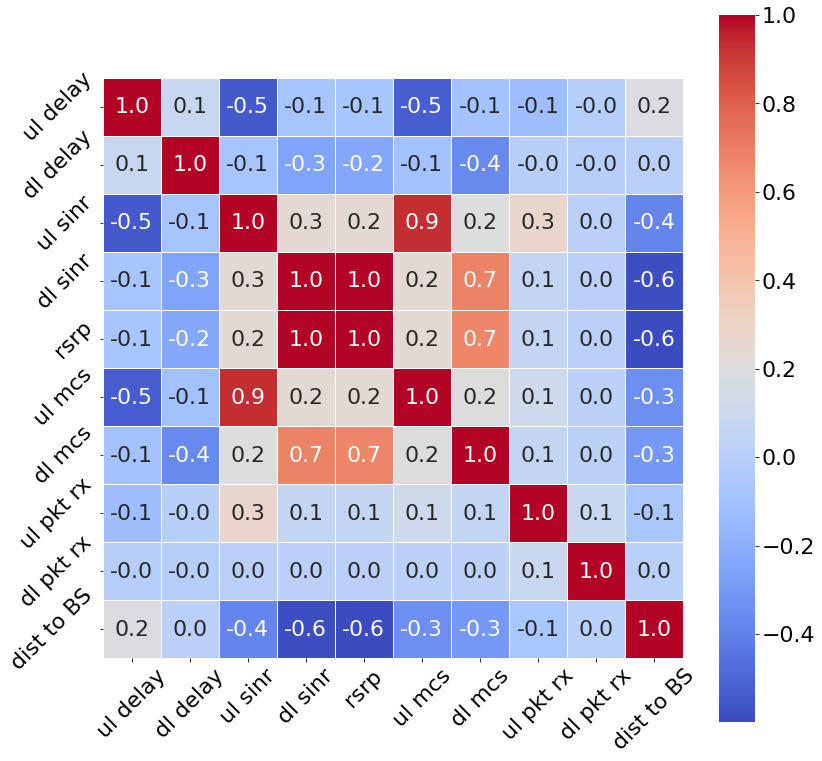

In [10]:
# plot a heatmap 
# The metrics to put in the heatmap 

print(len(w_ul_delays))
print(len(w_dl_delays))
#print(len(w_rtt_delays))
print(len(w_ul_sinr))
print(len(w_dl_sinr))
print(len(w_rsrp))
print(len(w_ul_mcs))
print(len(w_dl_mcs))
print(len(ul_pkt_rx))
print(len(dl_pkt_rx))
#print(len(rtt_pkt_rx))
#print(len(cell_ul_thput))
#print(len(cell_dl_thput))
print(len(w_dist_to_cell))
print(len(w_mode_assoc_cell))
#print(len(ul_thput))
#print(len(dl_thput))


windowed_combined_data = pd.DataFrame({'ul delay': w_ul_delays, 
                            'dl delay':w_dl_delays,
                            #'rtt delay':w_rtt_delays,
                            'ul sinr':w_ul_sinr,
                            'dl sinr':w_dl_sinr, 
                            'rsrp':w_rsrp,
                            'ul mcs':w_ul_mcs,
                            'dl mcs':w_dl_mcs,
                            'ul pkt rx':ul_pkt_rx,
                            'dl pkt rx':dl_pkt_rx,
                            #'rtt_pkt_rx':rtt_pkt_rx,
                            #'cell_ul_thput':cell_ul_thput,
                            #'cell_dl_thput':cell_dl_thput,
                            'dist to BS':w_dist_to_cell,
                            'cell ID':w_mode_assoc_cell
                            #'ul_thput:ul_thput,
                            #'dl_thput:dl_thput,  
                            })

corr_data = windowed_combined_data.corr(method='spearman')
fig = plt.figure(figsize=(13,13))
ax = sns.heatmap(corr_data, cmap=sns.color_palette("coolwarm", as_cmap=True), linewidth=.5, fmt=".1f", annot=True)
ax.set_aspect("equal")
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#sns.heatmap(corr_data, annot=corr_data.rank(axis="columns"), fmt=".1f", cmap=sns.color_palette("coolwarm", as_cmap=True))


plt.show()

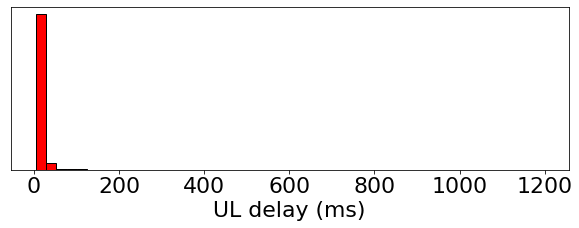

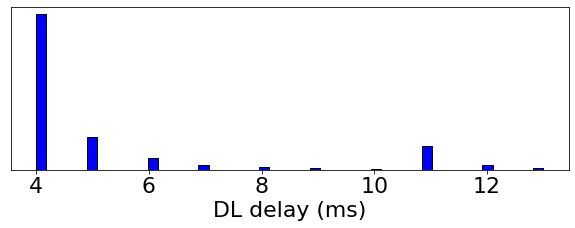

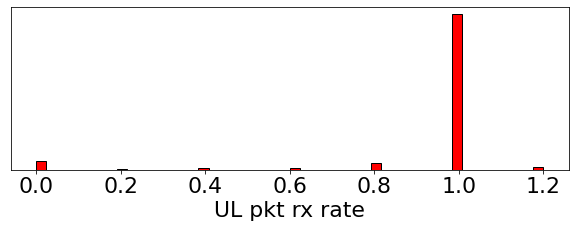

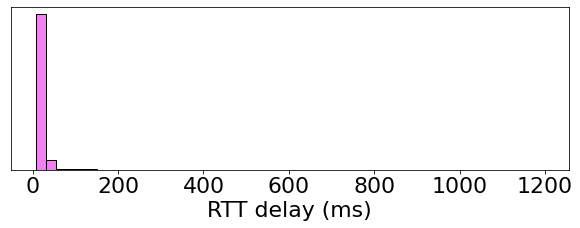

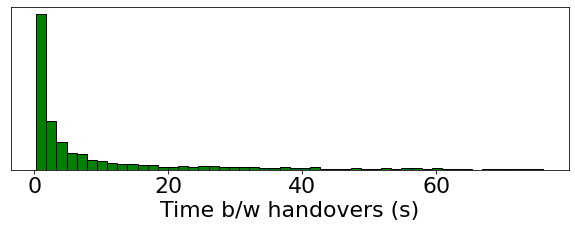

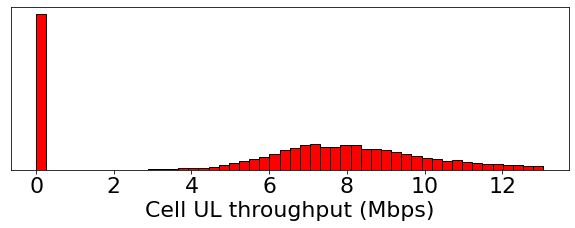

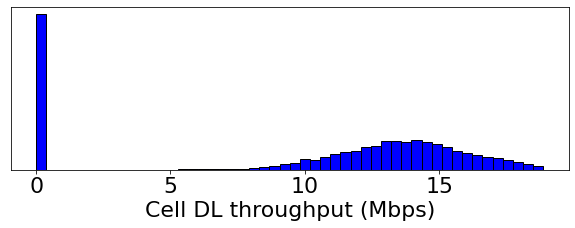

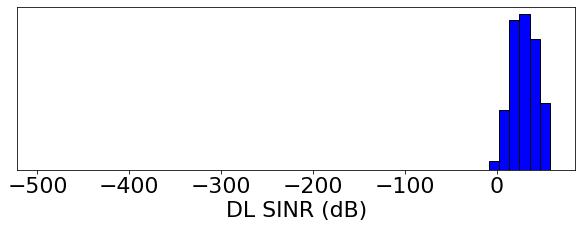

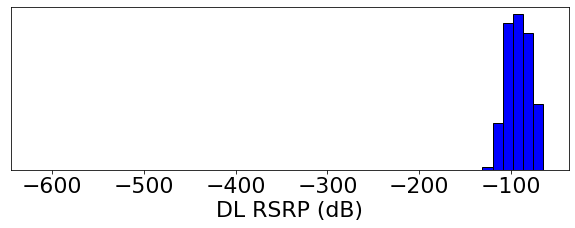

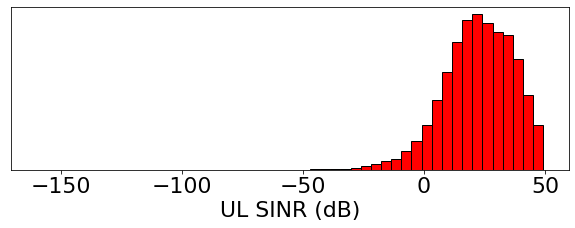

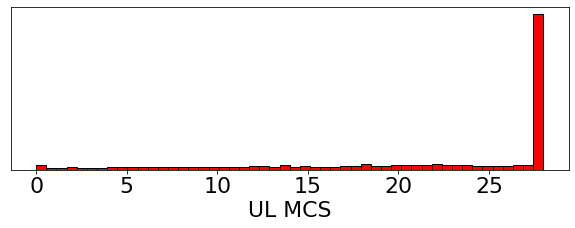

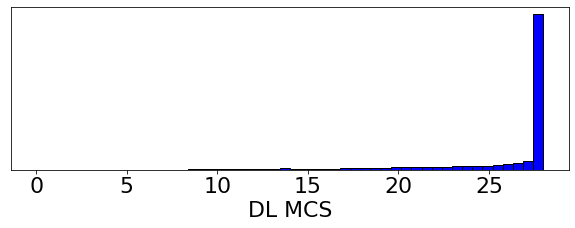

In [11]:
#=======================================
# Plot histograms   
#=======================================
# for metrics related to delay we are removing outliers using the 99th percentile value so that we can 
# get a better view of what is happenning in the data

if histogram_plots:
    if ('delay_trace.txt' in files):
        plot_histogram(ul_delays, 'red', 'UL delay (ms)', 'hist_ul_delays.png', plot_dir)
        plot_histogram(dl_delays, 'blue', 'DL delay (ms)', 'hist_dl_delays.png', plot_dir)
        plot_histogram(ul_pkt_rx, 'red', 'UL pkt rx rate', 'hist_ul_pkt_rx.png', plot_dir)
        #lot_histogram(dl_pkt_rx, 'blue', 'DL pkt rx rate', 'hist_dl_pkt_rx.png', plot_dir)
    if ('rtt_trace.txt' in files):
        plot_histogram(rtt_delays, 'violet', 'RTT delay (ms)', 'hist_rtt_delays.png', plot_dir)
    if ('ulThroughput_trace.txt' in files):
        plot_histogram(ul_thput, 'red', 'UL thput (Mbps)', 'hist_ul_thput.png', plot_dir)
    if ('dlThroughput_trace.txt' in files):
        plot_histogram(dl_thput, 'blue', 'DL thput (Mbps)', 'hist_dl_thput.png', plot_dir)
    if ('handover_trace.txt' in files):
        plot_histogram(time_bw_hos, 'green', 'Time b/w handovers (s)', 'hist_time_bw_hos.png', plot_dir)
    if ('httpClientRtt_trace.txt' in files):
        plot_histogram(page_load_time, 'green', 'Page load time for webpages (ms)', 'hist_page_load_time.png', plot_dir)
    if ('httpClientRtt_trace.txt' in files):
        plot_histogram(webpage_size, 'green', 'Webpage size (B)', 'hist_webpage_size.png', plot_dir)
    if ('dashClient_trace.txt' in files): 
        plot_histogram(segment_bitrate, 'green', 'Video segment bitrate', 'hist_segment_bitrate.png', plot_dir)
    if ('vrFragment_trace.txt' in files): 
        plot_histogram(vr_burst_time, 'green', 'VR time to send packet burst (ms)', 'hist_vr_burst_time.png', plot_dir)
    if ('UlMacStats.txt' in files):
        plot_histogram(cell_ul_thput, 'red', 'Cell UL throughput (Mbps)', 'hist_cell_ul_thput.png', plot_dir)
    if ('DlMacStats.txt' in files): 
        plot_histogram(cell_dl_thput, 'blue', 'Cell DL throughput (Mbps)', 'hist_cell_dl_thput.png', plot_dir)
    if ('DlRsrpSinrStats.txt' in files):
        plot_histogram(10*np.log10(dl_sinr), 'blue', 'DL SINR (dB)', 'hist_dl_sinr.png', plot_dir)
        plot_histogram(10*np.log10(1000*dl_rsrp), 'blue', 'DL RSRP (dB)', 'hist_dl_rsrp.png', plot_dir)
    if ('UlSinrStats.txt' in files):
        plot_histogram(10*np.log10(ul_sinr), 'red', 'UL SINR (dB)', 'hist_ul_sinr.png', plot_dir)
    if ('UlMacStats.txt' in files): 
        plot_histogram(w_ul_mcs, 'red', 'UL MCS', 'hist_ul_mcs.png', plot_dir)
    if ('DlMacStats.txt' in files): 
        plot_histogram(w_dl_mcs, 'blue', 'DL MCS', 'hist_dl_mcs.png', plot_dir)
        
      

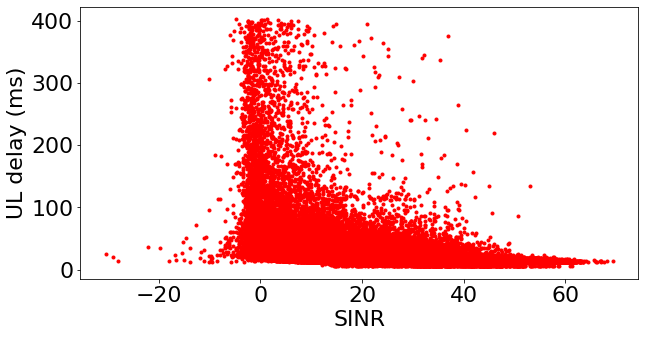

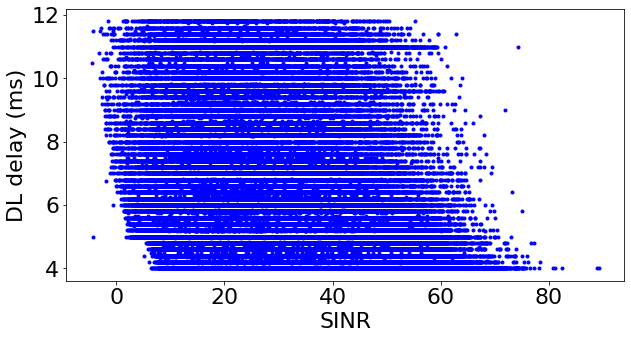

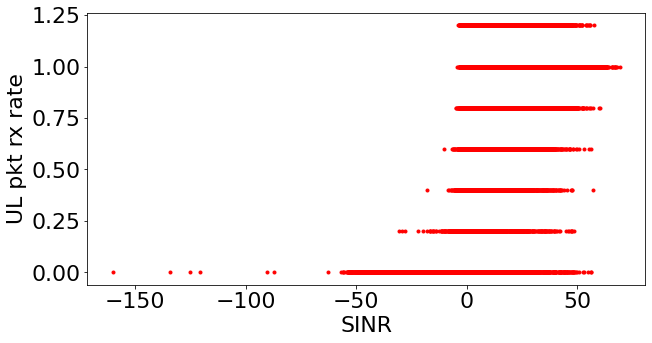

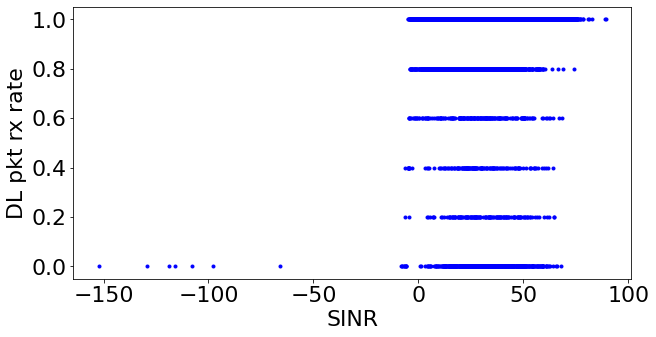

In [ ]:
#=======================================
# Plot metrics vs SINR   
#======================================= 

if ('delay_trace.txt' in files):
    plot_metric_vs_sinr(10*np.log10(w_ul_sinr), w_ul_delays, 'red', 'UL delay (ms)', 'ul_sinr_vs_delay.png', plot_dir)
    plot_metric_vs_sinr(10*np.log10(w_dl_sinr), w_dl_delays, 'blue', 'DL delay (ms)', 'dl_sinr_vs_delay.png', plot_dir)
    plot_metric_vs_sinr(10*np.log10(w_ul_sinr), ul_pkt_rx, 'red', 'UL pkt rx rate', 'ul_sinr_vs_ul_pkt_rx.png', plot_dir)
    plot_metric_vs_sinr(10*np.log10(w_dl_sinr), dl_pkt_rx, 'blue', 'DL pkt rx rate', 'dl_sinr_vs_dl_pkt_rx.png', plot_dir)
if ('UlMacStats.txt' in files) and ('DlMacStats.txt' in files):
    plot_metric_vs_sinr(10*np.log10(w_ul_sinr), w_ul_mcs, 'red', 'UL MCS', 'ul_sinr_vs_mcs.png', plot_dir)
    plot_metric_vs_sinr(10*np.log10(w_dl_sinr), w_dl_mcs, 'blue', 'DL MCS', 'dl_sinr_vs_mcs.png', plot_dir)
    
    fig = plt.figure(figsize=(10,10))
    plt.plot(10*np.log10(w_dl_sinr), 10*np.log10(w_ul_sinr), '.', color='k')
    plt.xlabel('DL SINR'); plt.ylabel('UL SINR'); 
    fname=plot_dir+'ul_vs_dl_sinr.png'
    plt.savefig(fname)
    plt.show()
    


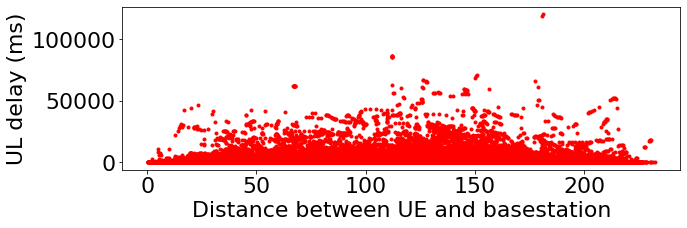

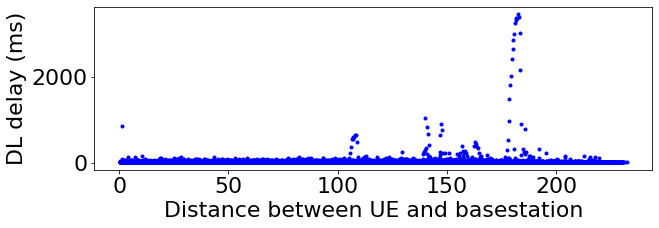

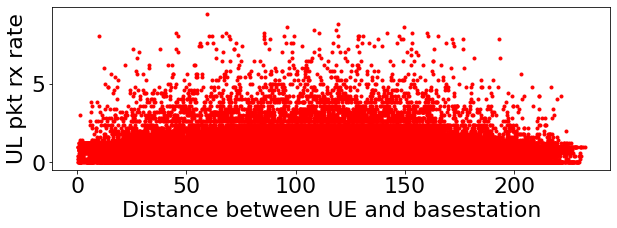

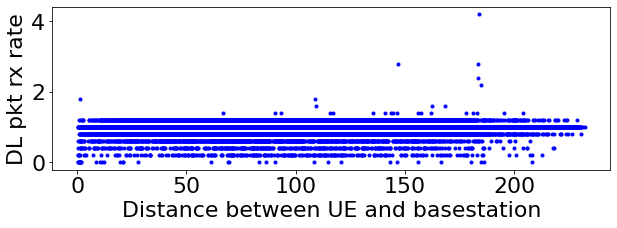

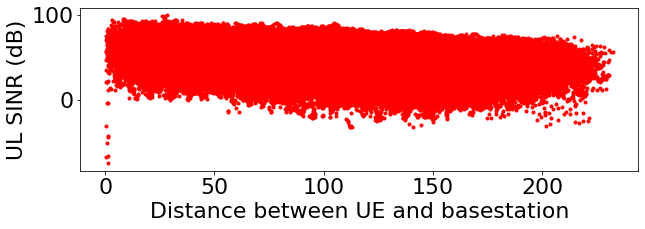

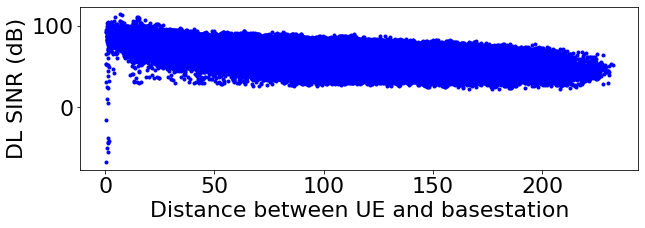

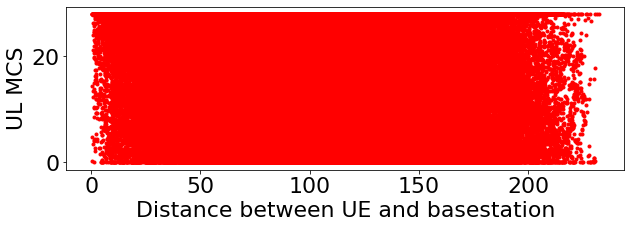

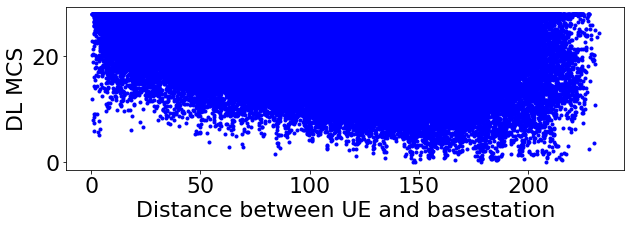

DONE


In [64]:
  
#=======================================
# Plot metrics vs UE-BS distance   
#======================================= 
if distance_plots:
    #print('Each plot with sample size: ', w_dist_to_cell.size)
    if ('delay_trace.txt' in files):
        plot_metric_vs_distance_to_cell(w_dist_to_cell, w_ul_delays, 'red', 'UL delay (ms)', 'dist_vs_ul_delay.png', plot_dir)
        plot_metric_vs_distance_to_cell(w_dist_to_cell, w_dl_delays, 'blue', 'DL delay (ms)', 'dist_vs_dl_delay.png', plot_dir)
        plot_metric_vs_distance_to_cell(w_dist_to_cell, ul_pkt_rx, 'red', 'UL pkt rx rate', 'dist_vs_ul_pkt_rx.png', plot_dir)
        plot_metric_vs_distance_to_cell(w_dist_to_cell, dl_pkt_rx, 'blue', 'DL pkt rx rate', 'dist_vs_dl_pkt_rx.png', plot_dir)
        
    #if ('rtt_trace.txt' in files):       
        #plot_metric_vs_distance_to_cell(w_dist_to_cell, w_rtt_delays, 'violet', 'RTT delay (ms)', 'dist_vs_rtt_delay.png', plot_dir)
    if ('ulThroughput_trace.txt' in files):
        #for a single user since only one user measures throughput
        imsi=1  
        imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        imsi_sliced_y = ul_thput[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'red', 'UL throughput (Mbps)', 'dist_vs_ul_thput.png', plot_dir)
        #plot_metric_vs_distance_to_cell(w_dist_to_cell, ul_thput, 'red', 'UL throughput (Mbps)', 'dist_vs_ul_thput.png', plot_dir)
    if ('dlThroughput_trace.txt' in files):
        #for a single user since only one user measures throughput
        imsi=1  
        imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        imsi_sliced_y = dl_thput[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        
        plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'blue', 'DL throughput (Mbps)', 'dist_vs_dl_thput.png', plot_dir)
        #plot_metric_vs_distance_to_cell(w_dist_to_cell, dl_thput, 'blue', 'DL throughput (Mbps)', 'dist_vs_dl_thput.png', plot_dir)
    if ('UlSinrStats.txt' in files):       
        plot_metric_vs_distance_to_cell(w_dist_to_cell, 10*np.log10(1000*w_ul_sinr), 'red', 'UL SINR (dB)', 'dist_vs_ul_sinr.png', plot_dir)
        # for a single user 
        #imsi=1  
        #imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #imsi_sliced_y = 10*np.log10(w_ul_sinr[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ])
        #plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'red', 'UL SINR (dB)', 'dist_vs_ul_sinr.png', plot_dir)
    if ('DlRsrpSinrStats.txt' in files):  
        plot_metric_vs_distance_to_cell(w_dist_to_cell, 10*np.log10(1000*w_dl_sinr), 'blue', 'DL SINR (dB)', 'dist_vs_dl_sinr.png', plot_dir)
        #imsi=1  
        #imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #imsi_sliced_y = 10*np.log10(w_dl_sinr[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ])
        #plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'blue', 'DL SINR (dB)', 'dist_vs_dl_sinr.png', plot_dir)
    if ('UlMacStats.txt' in files):
        plot_metric_vs_distance_to_cell(w_dist_to_cell, w_ul_mcs, 'red', 'UL MCS', 'dist_vs_ul_mcs.png', plot_dir)
        #imsi=1  
        #imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #imsi_sliced_y = w_ul_mcs[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'red', 'UL MCS', 'dist_vs_ul_mcs.png', plot_dir)
    if ('DlMacStats.txt' in files):
        plot_metric_vs_distance_to_cell(w_dist_to_cell, w_dl_mcs, 'blue', 'DL MCS', 'dist_vs_dl_mcs.png', plot_dir)
        #imsi=1  
        #imsi_sliced_x = w_dist_to_cell[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #imsi_sliced_y = w_dl_mcs[int((imsi-1)*(sim_time*1000/time_wind_val)) : int(imsi*(sim_time*1000/time_wind_val)-1)  ]
        #plot_metric_vs_distance_to_cell(imsi_sliced_x, imsi_sliced_y, 'blue', 'DL MCS', 'dist_vs_dl_mcs.png', plot_dir)
        
            
print('DONE')
#wandb.finish    

In [65]:
import seaborn as sns
from matplotlib import cm, colors
from random import randint
from random import sample

ue_loc_file = 'mobility_trace.txt'
enb_loc_file = 'gnb_locations.txt'

In [66]:
# Specify here topology details from the dataset we are using
# When ISD = 500 m
area_xlim=(-170,170)
area_ylim=(-170,170)

# When ISD = 200 m 
#area_xlim=(-70,70)
#area_ylim=(-70,70)

clr_map=['r','b','g', 'gold', 'gold', 'gold']

In [67]:
# When ISD = 500 m
#area_xlim=[-650,650]
#area_ylim=[-650,650]

# Creates a list of random colours to use 
#clr_map = []
#for i in range(total_num_cells):
#    clr_map.append('#%06X' % randint(0, 0xFFFFFF))

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run3


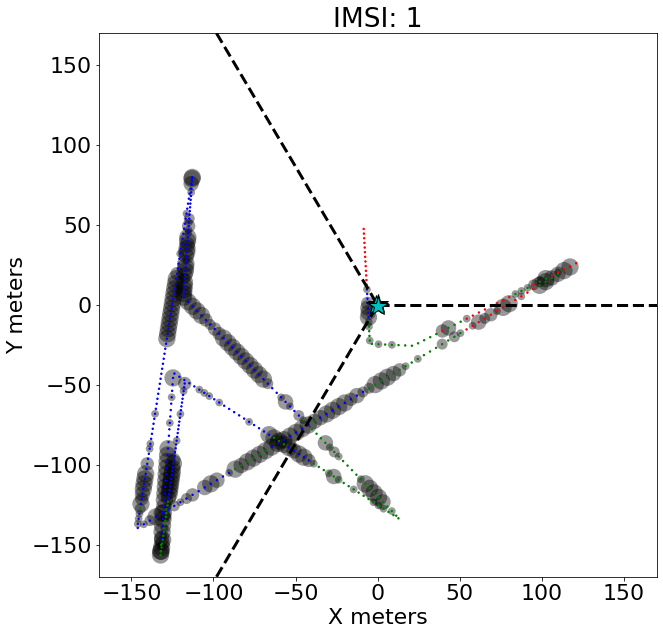

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run6


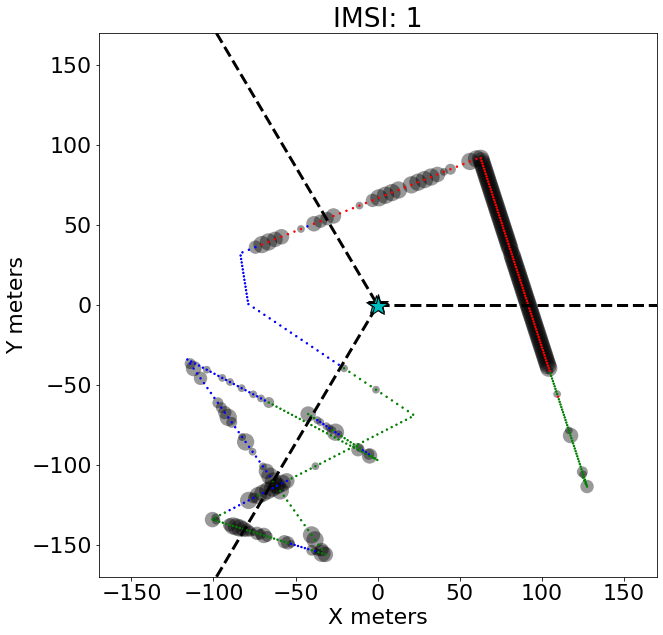

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run8


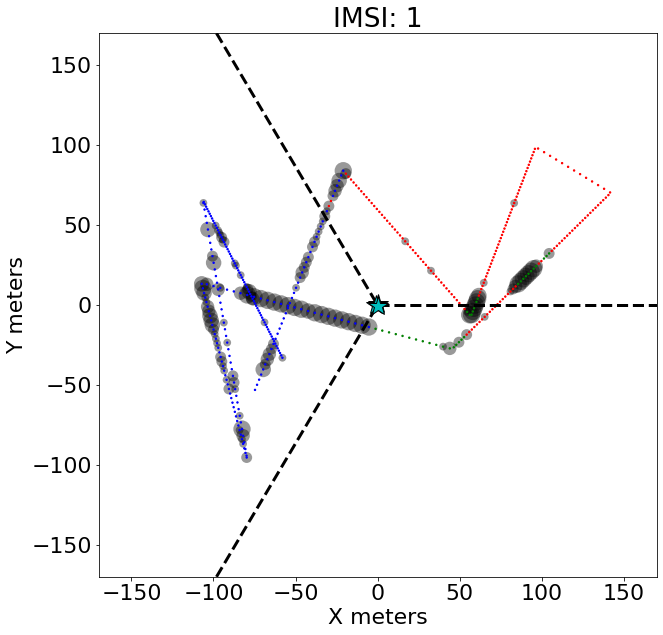

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run5


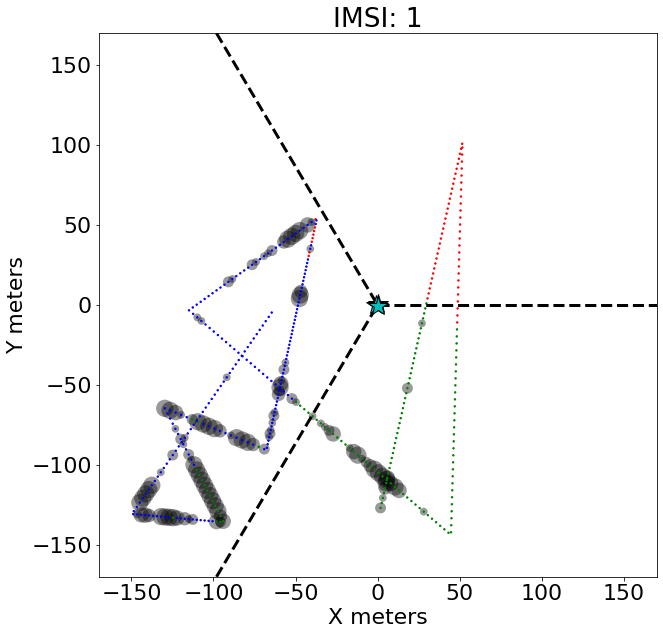

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run7


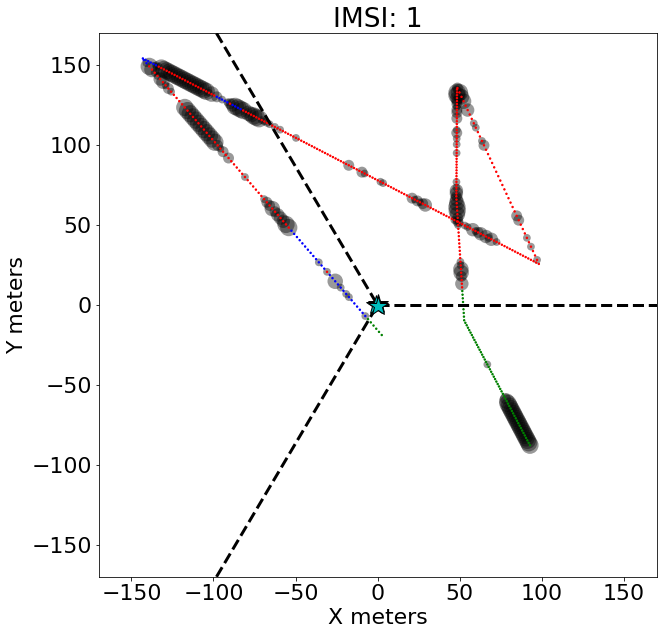

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run10


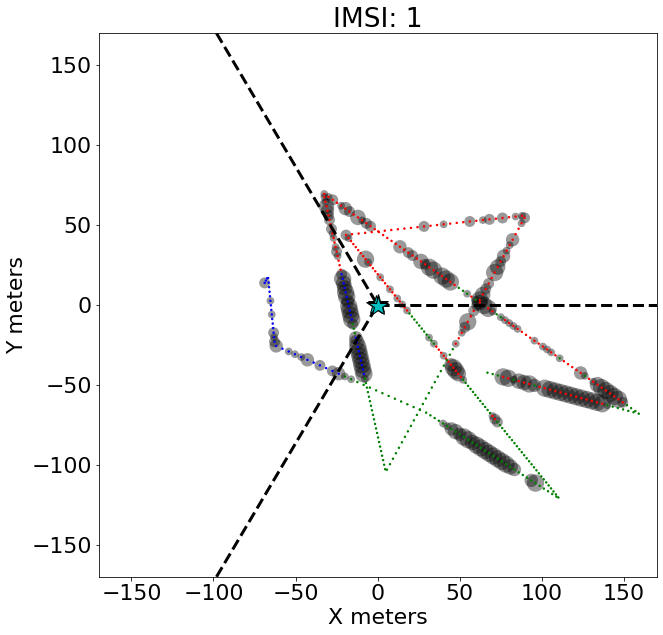

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run9


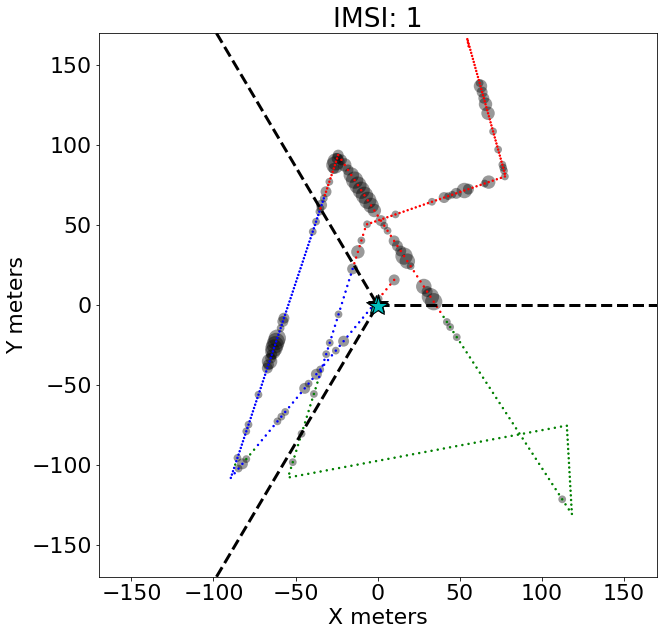

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run1


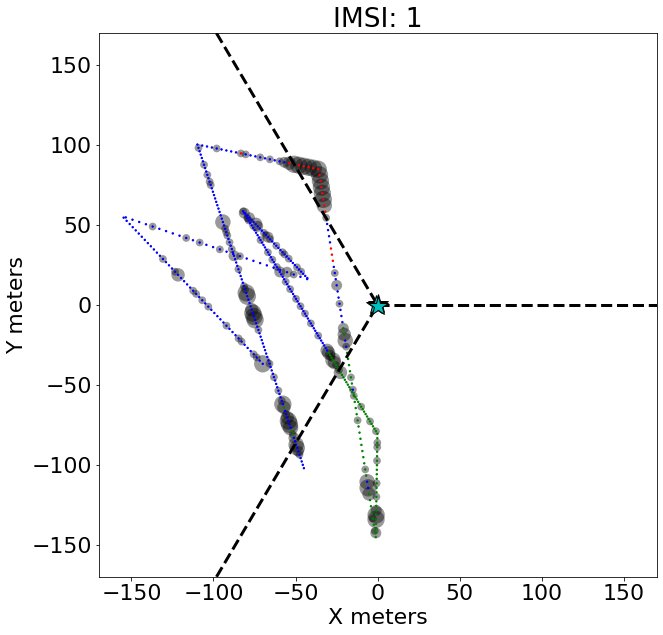

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run4


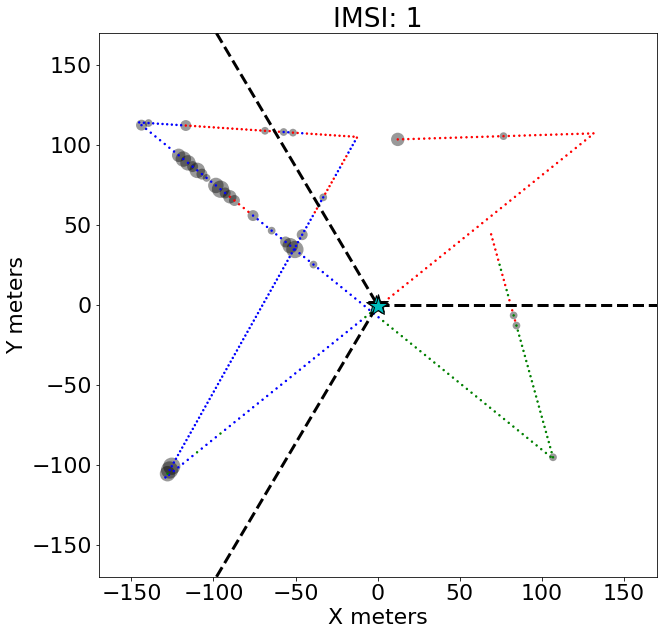

../../data_volume/lte_3macro_90Ue_delay_rtt_UMi_ISD500m__70Beam_3Gain_ueTxAuto_macroTx30_a2a4rsrq/run2


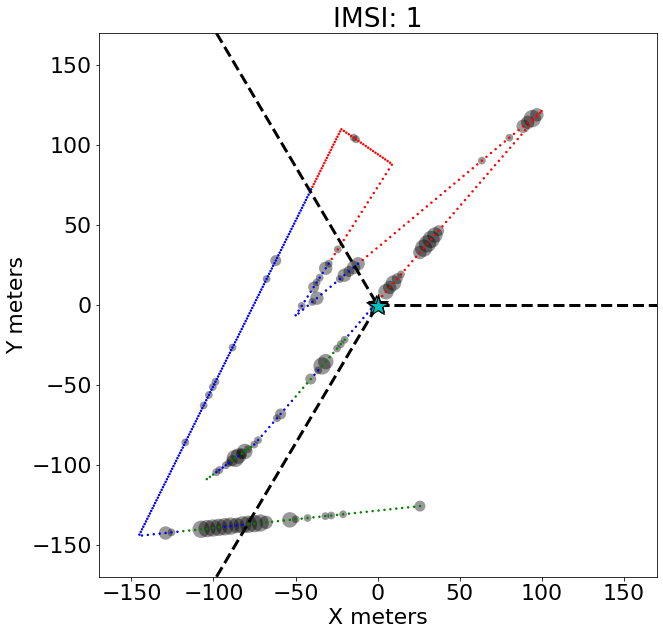

In [68]:
for rdx, run in enumerate(glob.glob(data_dir+'run*')):
#for run in ['run1']:
    print('============================================================')
    print (run)
    print('============================================================')    
    only_run = run.split('/')[-1]
    if only_run in skip_runs:
        continue
    bs_locs = pd.read_csv(run+'/'+enb_loc_file, sep=',')
    bs_cellIds = bs_locs['cellId']
    bs_locs = bs_locs[['gnbpos_x', 'gnbpos_y']]
    # imsis chosen for plotting 
    #chosen_imsis=sample(range(1, total_num_ues+1), 3)
    chosen_imsis=[1]
    
    
    df = pd.read_csv(data_dir+run+'/'+ue_loc_file, sep='\t')
    
    samples_per_run_per_imsi = (sim_time*1000/time_wind_val) +1
    shift = rdx*samples_per_run_per_imsi*total_num_ues
    #print('run start sample : ', int(shift))
    #print('run last sample : ', int(shift + (total_num_ues*samples_per_run_per_imsi-1)))
    ## Separate by UE
    #for name, df_ue in df.groupby(by=['IMSI']):
    df_ue=df.groupby(by=['IMSI'])
    
    #fig = plt.figure(figsize=(10,10))
    
    for imsi in chosen_imsis:
        df_per_imsi=df_ue.get_group(imsi)
        #print(df_per_imsi['cellId'].value_counts())
        colors=[clr_map[cell-1] for cell in df_per_imsi['cellId'].to_numpy()]
        #w_ul_sinr
        #w_ul_mcs
        #ul_pkt_rx
        data = pd.DataFrame({'ue_x':w_avg_ue_xpos, 'ue_y':w_avg_ue_ypos, 'metric':(1-ul_pkt_rx).clip(min=0), 'cellId':w_mode_assoc_cell})
        imsi_sliced_data = data[ int(shift + (imsi-1)*samples_per_run_per_imsi)  : int(shift + (imsi*samples_per_run_per_imsi-1))  ]
        # The lines indicating the cell edge 
        fig = plt.figure(figsize=(10,10))
        plt.plot([0, area_xlim[1]], [0, 0], 'k', linestyle="--", linewidth=3)
        plt.plot([area_ylim[0]/math.sqrt(3), 0], [area_ylim[1], 0], 'k', linestyle="--", linewidth=3)
        plt.plot([area_ylim[0]/math.sqrt(3), 0], [area_ylim[0], 0], 'k', linestyle="--", linewidth=3)
        # plot the metric 
        sns.scatterplot(data=imsi_sliced_data, x='ue_x', y='ue_y', size='metric', legend=False, alpha=0.4, sizes=(0, 300), color='k', edgecolor='k')
        # plot the association as a colour
        plt.scatter(df_per_imsi['pos_x'], df_per_imsi['pos_y'], c=colors, s=2)
        plt.title('IMSI: '+str(imsi))
        #plt.title('Run: ', )
        plt.xlim(area_xlim)
        plt.ylim(area_ylim)
        plt.xlabel('X meters')
        plt.ylabel('Y meters')
        ## plot base station locations 
        plt.plot(bs_locs['gnbpos_x'], bs_locs['gnbpos_y'], 'c*', markersize=20, markeredgecolor='k')
        plt.show()
    

In [49]:
import os
os.system('cp parse_visualize_data.ipynb '+'./saved_notebooks/'+data_dir.split('/')[-2]+'.ipynb')

0